In [133]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle
import sklearn
import xgboost as xgb

In [122]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv("/content/drive/MyDrive/Case/teste_indicium_precificacao.csv")
df

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48889,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48890,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48891,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48892,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [8]:
df.isnull().sum()

,0
id,0
nome,16
host_id,0
host_name,21
bairro_group,0
bairro,0
latitude,0
longitude,0
room_type,0
price,0


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48894.0,1.901753e+07,1.098288e+07,2595.00000,9.472371e+06,1.967743e+07,2.915225e+07,3.648724e+07
host_id,48894.0,6.762139e+07,7.861118e+07,2438.00000,7.822737e+06,3.079553e+07,1.074344e+08,2.743213e+08
latitude,48894.0,4.072895e+01,5.452939e-02,40.49979,4.069010e+01,4.072308e+01,4.076312e+01,4.091306e+01
longitude,48894.0,-7.395217e+01,4.615712e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48894.0,1.527208e+02,2.401566e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimo_noites,48894.0,7.030085e+00,2.051074e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
numero_de_reviews,48894.0,2.327476e+01,4.455099e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_por_mes,38842.0,1.373251e+00,1.680453e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculado_host_listings_count,48894.0,7.144005e+00,3.295286e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
disponibilidade_365,48894.0,1.127762e+02,1.316187e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


In [10]:
df.duplicated().sum()

0

# Análise Exploratória (EDA)

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Quantidade dos tipos de imóveis


In [12]:
df.groupby('room_type')['room_type'].count()

,room_type
room_type,
Entire home/apt,25409
Private room,22325
Shared room,1160


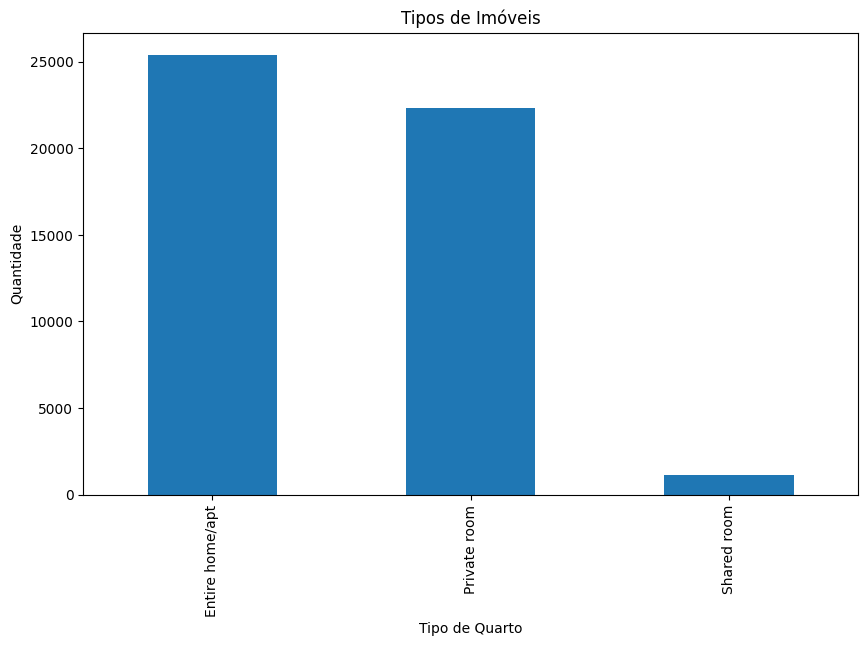

In [13]:
#Grafico dos tipos de quartos
df['room_type'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title('Tipos de Imóveis')
plt.xlabel('Tipo de Quarto')
plt.ylabel('Quantidade')
plt.show()

### Anúncios por bairro (boroughs)

In [14]:
df.groupby('bairro_group')['bairro_group'].count()

,bairro_group
bairro_group,
Bronx,1091
Brooklyn,20103
Manhattan,21661
Queens,5666
Staten Island,373


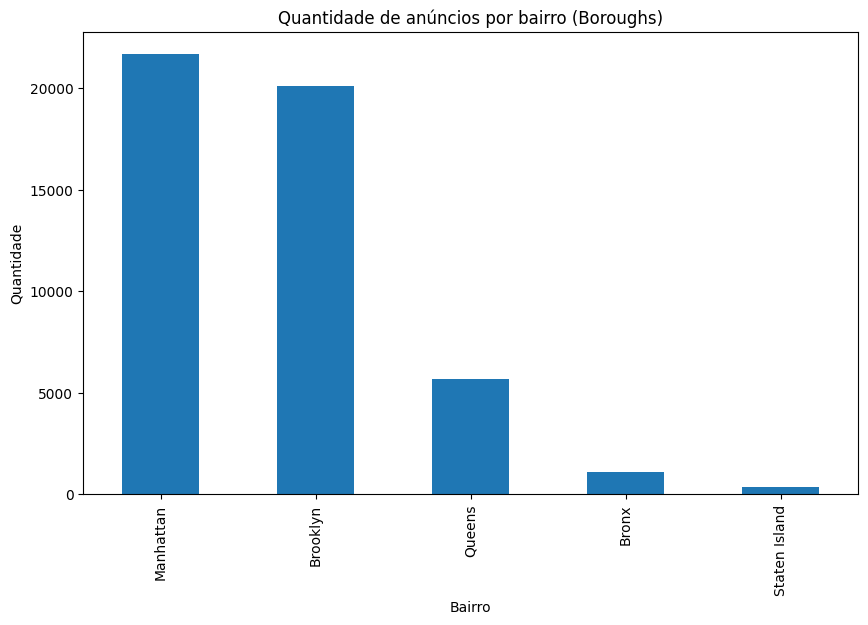

In [15]:
#Gráfico da quantidade de anuncios por bairro
df.groupby('bairro_group')['bairro_group'].count().sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Quantidade de anúncios por bairro (Boroughs)')
plt.xlabel('Bairro')
plt.ylabel('Quantidade')
plt.show()

### Top 20 bairros com mais anuncios

In [16]:
df.groupby("bairro")['bairro'].count().sort_values(ascending=False).head(20)

,bairro
bairro,
Williamsburg,3920
Bedford-Stuyvesant,3714
Harlem,2658
Bushwick,2465
Upper West Side,1971
Hell's Kitchen,1958
East Village,1853
Upper East Side,1798
Crown Heights,1564


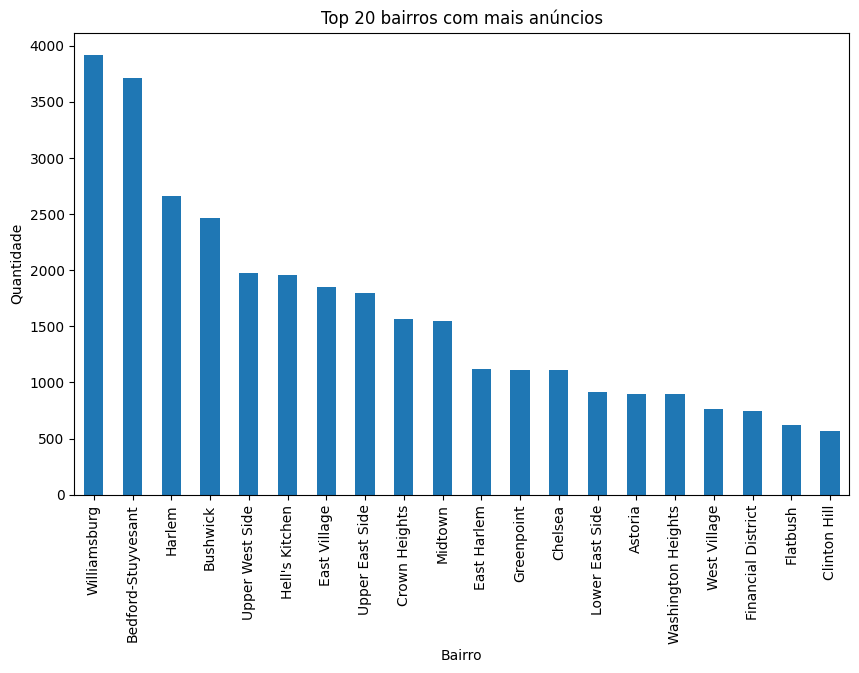

In [17]:
#gráfico dos 20 bairros com mais anuncios
df.groupby("bairro")['bairro'].count().sort_values(ascending=False).head(20).plot(kind='bar', figsize=(10, 6))
plt.title("Top 20 bairros com mais anúncios")
plt.xlabel("Bairro")
plt.ylabel("Quantidade")
plt.xticks(rotation=90)
plt.show()

### Visualização da distribuição geográfica dos preços

In [18]:
import plotly.express as px
fig = px.scatter_mapbox(
    df,
    lat='latitude',
    lon='longitude',
    color='price',
    size='price',
    color_continuous_scale=px.colors.diverging.Tropic,
    mapbox_style='carto-darkmatter',
    zoom=10,
    title='Distribuição geográfica dos preços (com outliers)'
)
fig.show()

### Verificando a distribuição das variáveis numéricas

In [19]:
num_columns = ['price', 'minimo_noites', 'disponibilidade_365']

<ipython-input-20-0bf6e36fcf4b>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



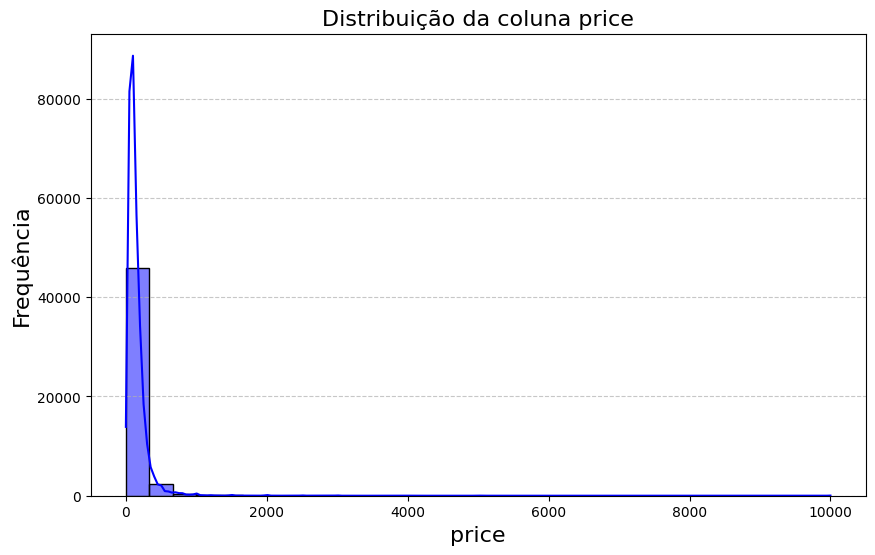

<ipython-input-20-0bf6e36fcf4b>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



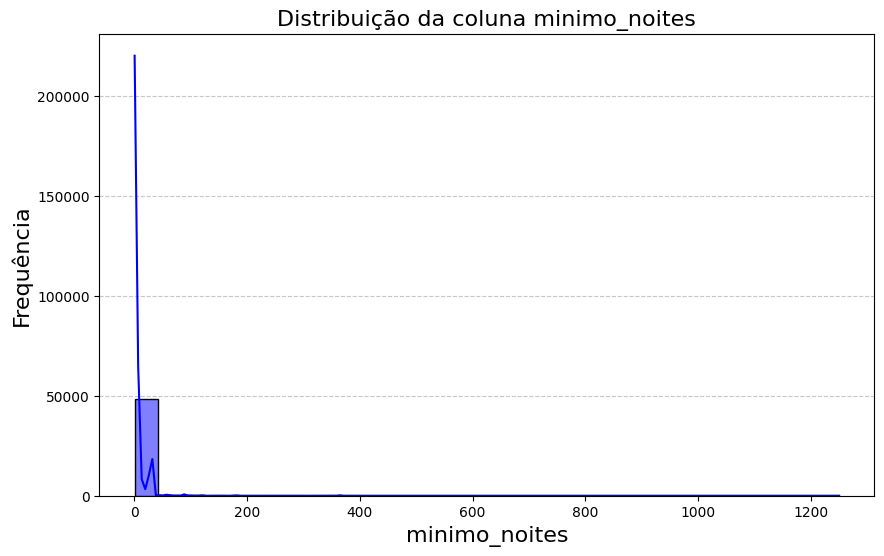

<ipython-input-20-0bf6e36fcf4b>:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



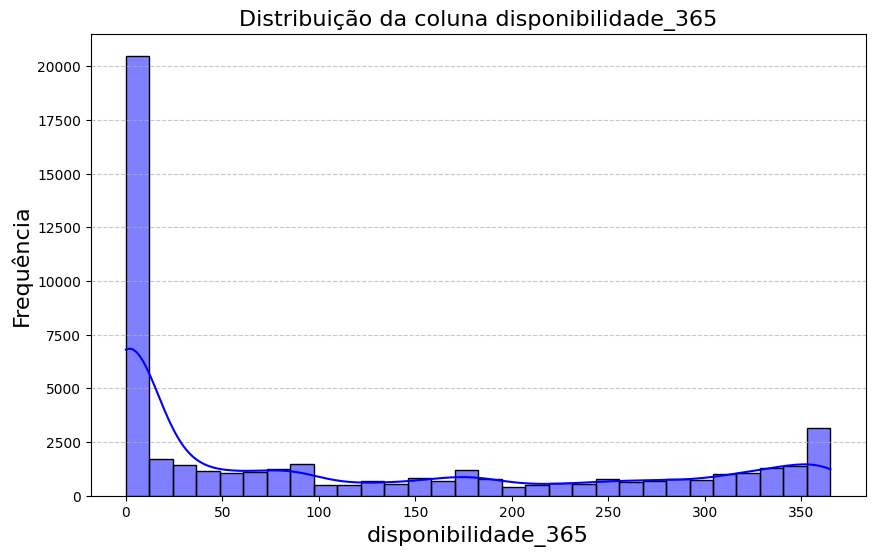

In [20]:
%matplotlib inline
for col in num_columns:
  plt.figure(figsize=(10, 6))
  sns.histplot(df[col], kde=True, bins=30, color='blue', palette='Blues')
  plt.title(f'Distribuição da coluna {col}', fontsize=16)
  plt.xlabel(col, fontsize=16)
  plt.ylabel('Frequência', fontsize=16)
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.show()

### Correlação das variáveis

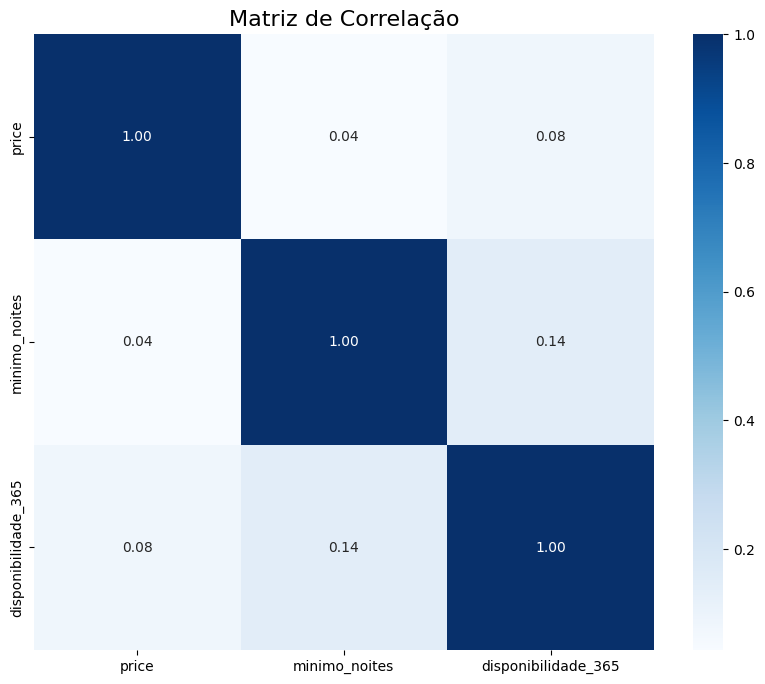

In [21]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[num_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Matriz de Correlação', fontsize=16)
plt.show()

### Boxplot do preço por cada bairro (boroughs)

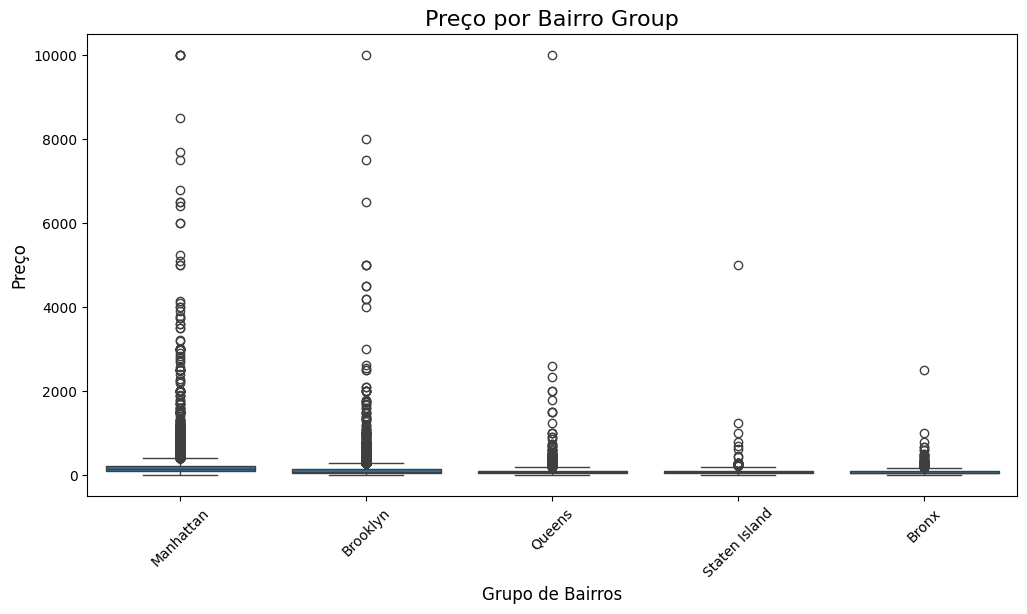

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='bairro_group', y='price', data=df)
plt.title('Preço por Bairro Group', fontsize=16)
plt.xlabel('Grupo de Bairros', fontsize=12)
plt.ylabel('Preço', fontsize=12)
plt.xticks(rotation=45)
plt.show()

### Preço por tipo de imóvel

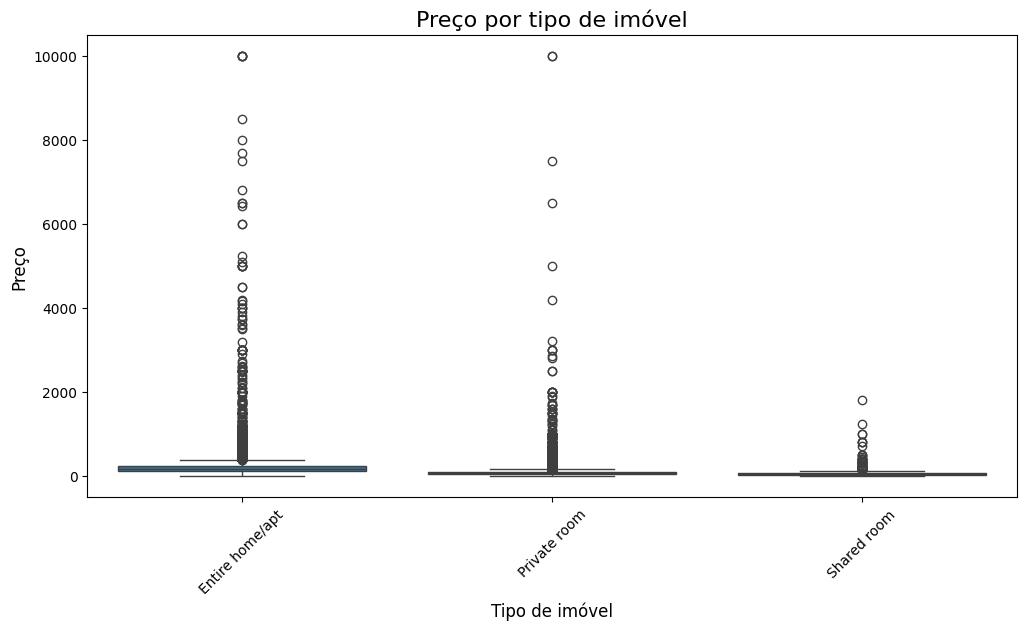

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Preço por tipo de imóvel', fontsize=16)
plt.xlabel('Tipo de imóvel', fontsize=12)
plt.ylabel('Preço', fontsize=12)
plt.xticks(rotation=45)
plt.show()

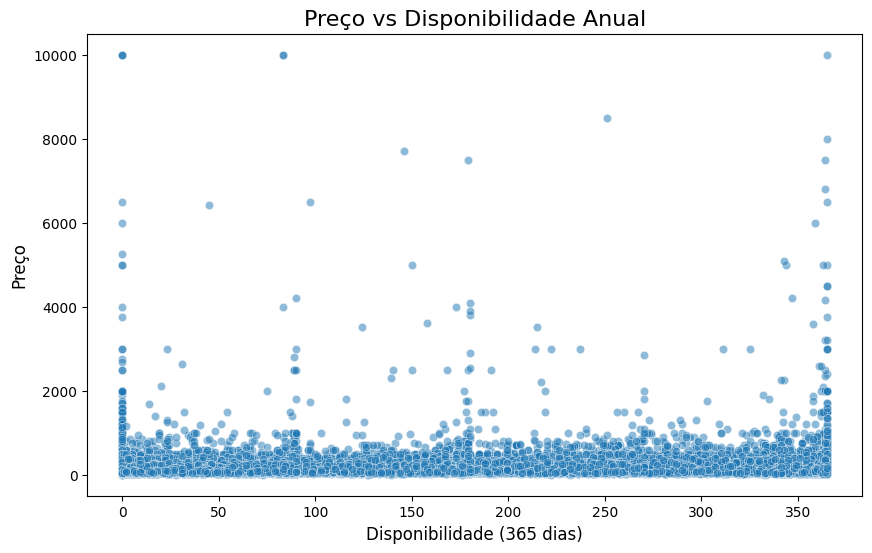

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='disponibilidade_365', y='price', data=df, alpha=0.5)
plt.title('Preço vs Disponibilidade Anual', fontsize=16)
plt.xlabel('Disponibilidade (365 dias)', fontsize=12)
plt.ylabel('Preço', fontsize=12)
plt.show()

### Realizando TF-IDF para capturar as palavras de mais importância dos anúncios

- Capturando a coluna de anúncios e extraindo em arquivo .txt

In [25]:
df['nome'].dropna().to_csv('anuncios.txt', index=False, header=False)

- Abrindo o arquivo e vetorizando as palavras

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
with open('anuncios.txt', 'r') as file:
    anuncios = file.readlines()

vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(anuncios)

- Capturando as palavras mais importantes

In [27]:
feature_names = vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.sum(axis=0).A1

- Criando dataframe para exibir em gráficos as 25 palavras com mais importância nos anúncios

<ipython-input-28-54889e4a4499>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




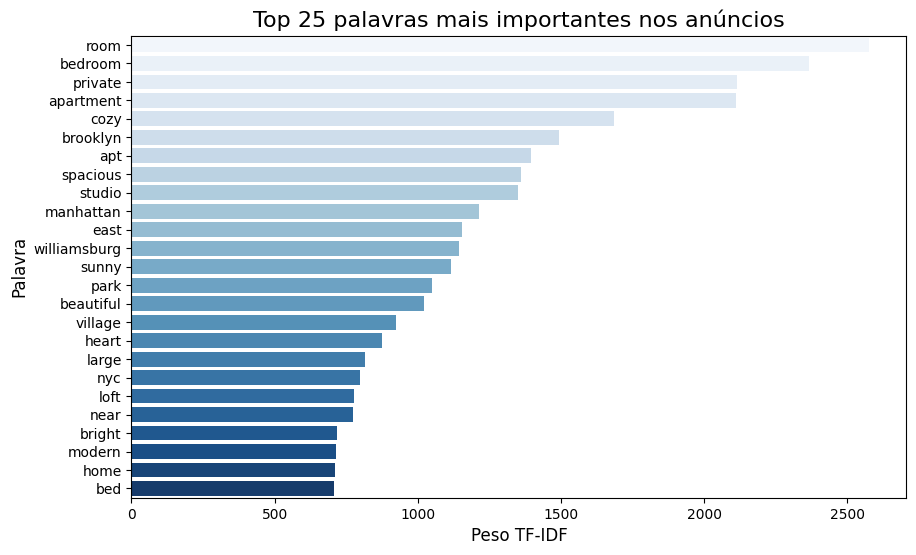

In [28]:
# criando um dataframe com as palavras e seus scores
tfidf_df = pd.DataFrame({'palavra': feature_names, 'peso': tfidf_scores})
tfidf_df = tfidf_df.sort_values(by='peso', ascending=False)

# grafico para as palavras mais importantes
plt.figure(figsize=(10, 6))
sns.barplot(x='peso', y='palavra', data=tfidf_df.head(25), palette='Blues')
plt.title('Top 25 palavras mais importantes nos anúncios', fontsize=16)
plt.xlabel('Peso TF-IDF', fontsize=12)
plt.ylabel('Palavra', fontsize=12)
plt.show()

# Tratamento dos dados

In [29]:
df.isnull().sum()

,0
id,0
nome,16
host_id,0
host_name,21
bairro_group,0
bairro,0
latitude,0
longitude,0
room_type,0
price,0


- Preechendo os valores nulos da coluna reviews_por_mes com 0
- Preenchendo valores nulos da coluna nome por "sem anuncio"
- Removendo a coluna ultima_review, ela não tem utilidade para o nosso problema
- Preenchendo valores nulos da coluna host_name com "Sem nome"


In [30]:
df['reviews_por_mes'].fillna(0, inplace = True)
df['nome'].fillna('Sem anuncio', inplace = True)
df.drop(columns = ['ultima_review'], inplace = True)
df['host_name'].fillna("Sem nome", inplace = True)

<ipython-input-30-35920027f218>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-30-35920027f218>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[

In [31]:
df.isnull().sum()

,0
id,0
nome,0
host_id,0
host_name,0
bairro_group,0
bairro,0
latitude,0
longitude,0
room_type,0
price,0


### Tratando outliers da coluna price
Dado o comportamento da coluna price, o **método do IQR** (Intervalo Interquartil) seria mais robusto porque:

- Ele é menos sensível a distribuições assimétricas.
- Remove valores extremos baseando-se em percentis.

Para aplicarmos o IQR (Intervalo entre quartis), faremos:
- Capturar o primeiro quartil (Q1), que é 25% dos dados
- Capturar o terceiro quartil (Q2), que é 75% dos dados
- Calcular o intervalo quartil (IQR)
- Definir o limite inferior e superior
- Filtrar os dados para remover os outliers

In [32]:
#calculando o iqr (q3 - q1)
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
#Intervalo interquartil (iqr)
iqr = q3 - q1

#definindo limites inferior e superior
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

#filtrando os dados para remover outliers
df_new = df[(df['price'] >= limite_inferior) & (df['price'] <= limite_superior)]

#### Visulizando nova distribuição

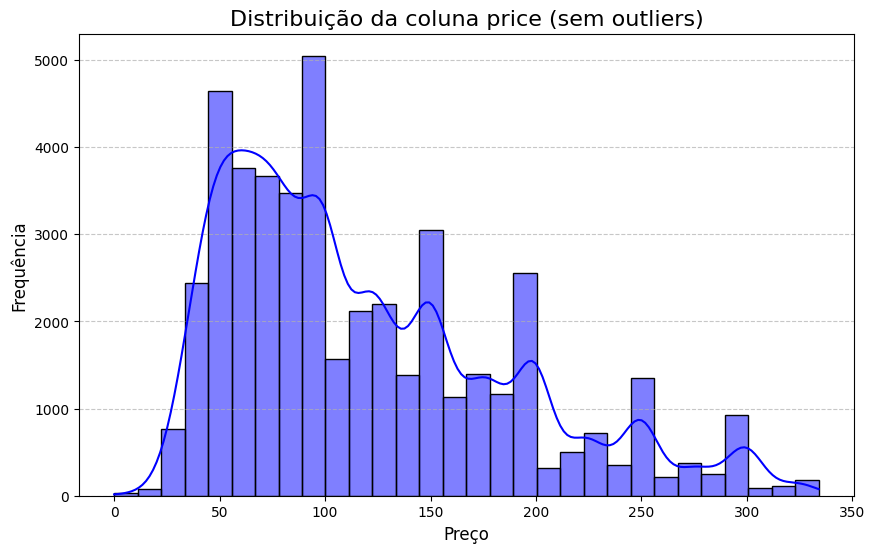

(48894, 45922)

In [33]:
len_original = len(df)
len_filtrado = len(df_new)

plt.figure(figsize=(10, 6))
sns.histplot(df_new['price'], kde=True, bins=30, color='blue')
plt.title('Distribuição da coluna price (sem outliers)', fontsize=16)
plt.xlabel('Preço', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

len_original, len_filtrado

#### Distribuição geográfica dos preços sem outliers

In [34]:
fig = px.scatter_mapbox(
    df_new,
    lat='latitude',
    lon='longitude',
    color='price',
    size='price',
    color_continuous_scale=px.colors.diverging.Tropic,
    mapbox_style='carto-darkmatter',
    zoom=9,
    title='Distribuição geográfica dos preços (sem outliers)'
)
fig.show()

#### Verificaando Assimetria (Skewness):
- Se a assimetria for maior que 1 ou menor que -1, a distribuição pode ser considerada enviesada.
- O valor da assimetria de 0.9238 é considerado moderadamente enviesada, nesse caso, utilizaremos modelos que são menos sensíveis a assimetria

In [35]:
skewness = df_new['price'].skew()
print(f"Assimetria da distribuição: {skewness}")

Assimetria da distribuição: 0.9238579981332621


# Questões solicitadas


#### A) Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?

#### Resposta:
- Bairros como Manhattan e Brooklyn possuem os maiores preços médios, mas a alta quantidade de reviews e anúncios em Brooklyn sugere uma demanda mais consistente, tornando-o ideal para investimentos em aluguel

In [36]:
media_preco_borough = df_new.groupby('bairro_group')['price'].mean().sort_values(ascending=False)
print("Preço médio por grupo de bairro (borough): ", media_preco_borough)

Preço médio por grupo de bairro (borough):  bairro_group
Manhattan        145.952835
Brooklyn         105.697383
Staten Island     89.235616
Queens            88.904437
Bronx             77.365421
Name: price, dtype: float64


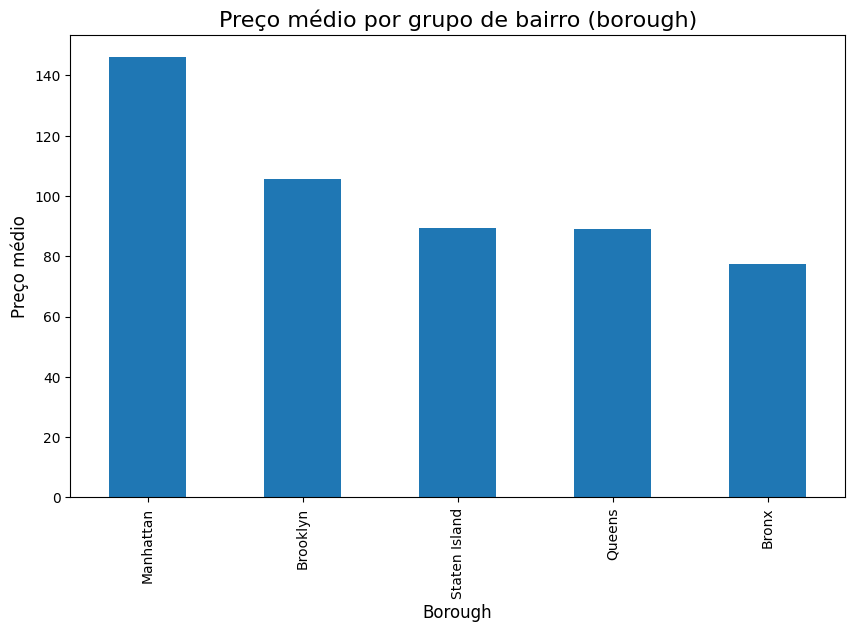

In [37]:
#grafico media_preco_borough
media_preco_borough.plot(kind='bar', figsize=(10, 6))
plt.title('Preço médio por grupo de bairro (borough)', fontsize=16)
plt.xlabel('Borough', fontsize=12)
plt.ylabel('Preço médio', fontsize=12)
plt.show()

In [38]:
media_preco_bairro = df_new.groupby('bairro')['price'].mean().sort_values(ascending=False)
print("Preço médio por bairro: ", media_preco_bairro)

Preço médio por bairro:  bairro
Willowbrook     249.000000
Neponsit        237.000000
Breezy Point    213.333333
Tribeca         212.495327
NoHo            205.290909
                   ...    
Corona           54.412698
Soundview        53.466667
Tremont          51.545455
Hunts Point      50.500000
Bull's Head      47.333333
Name: price, Length: 219, dtype: float64


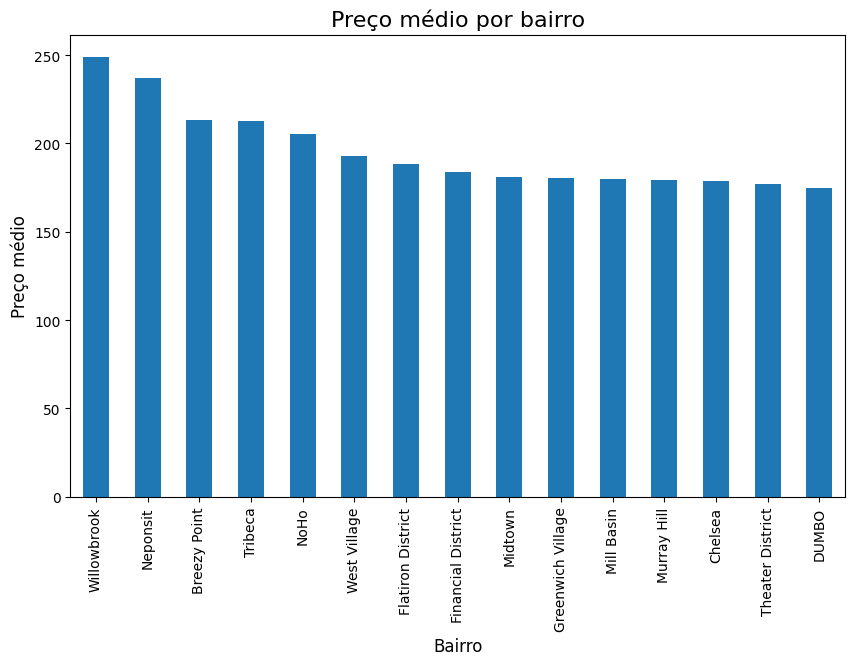

In [39]:
#grafico media_preco_bairro dos 15 primeiros bairros
media_preco_bairro.head(15).plot(kind='bar', figsize=(10, 6))
plt.title('Preço médio por bairro', fontsize=16)
plt.xlabel('Bairro', fontsize=12)
plt.ylabel('Preço médio', fontsize=12)
plt.show()

In [40]:
anuncios_bairro = df_new.groupby('bairro_group')['nome'].count().sort_values(ascending=False)
print("Quantidade de anúncios por bairro: ", anuncios_bairro)

Quantidade de anúncios por bairro:  bairro_group
Manhattan        19506
Brooklyn         19414
Queens            5567
Bronx             1070
Staten Island      365
Name: nome, dtype: int64


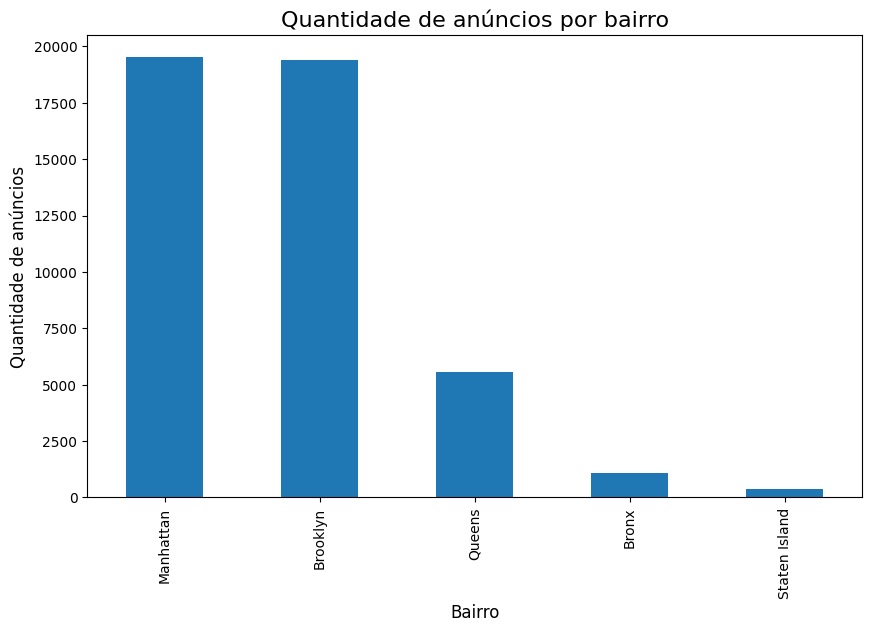

In [41]:
#grafico anuncios_bairro
anuncios_bairro.plot(kind='bar', figsize=(10, 6))
plt.title('Quantidade de anúncios por bairro', fontsize=16)
plt.xlabel('Bairro', fontsize=12)
plt.ylabel('Quantidade de anúncios', fontsize=12)
plt.show()

#### B) O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?

#### Resposta:
- Embora disponibilidade_365 apresente correlação positiva moderada com o preço, o número mínimo de noites não mostrou grande impacto direto. Isso indica que a disponibilidade ao longo do ano é um fator mais relevante para a precificação.

In [42]:
# correlação entre minimo_noites, disponibilidade_365 e price
correlation = df_new[['minimo_noites', 'disponibilidade_365', 'price']].corr()
print("Correlação entre as variáveis", correlation)

Correlação entre as variáveis                      minimo_noites  disponibilidade_365     price
minimo_noites             1.000000             0.146476  0.031457
disponibilidade_365       0.146476             1.000000  0.066588
price                     0.031457             0.066588  1.000000


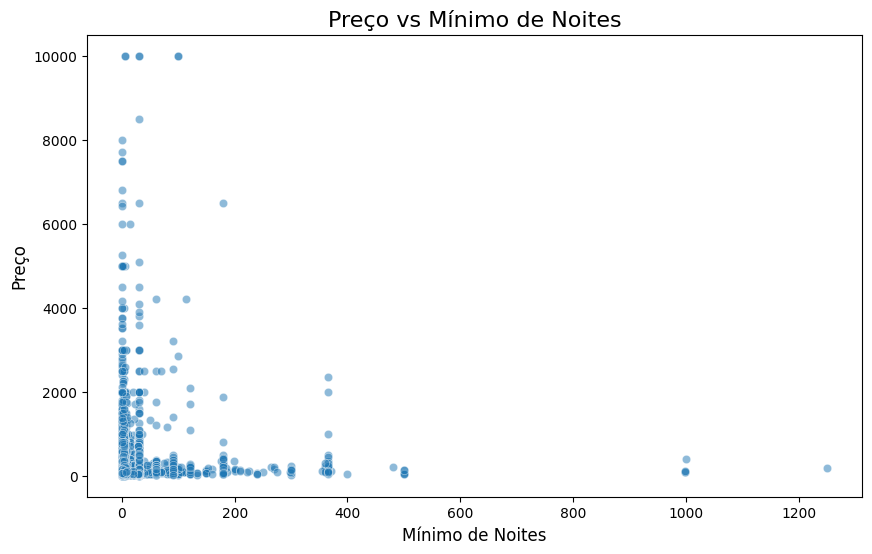

In [43]:
#grafico preço vs minimo de noites
plt.figure(figsize=(10, 6))
sns.scatterplot(x='minimo_noites', y='price', data=df, alpha=0.5)
plt.title('Preço vs Mínimo de Noites', fontsize=16)
plt.xlabel('Mínimo de Noites', fontsize=12)
plt.ylabel('Preço', fontsize=12)
plt.show()

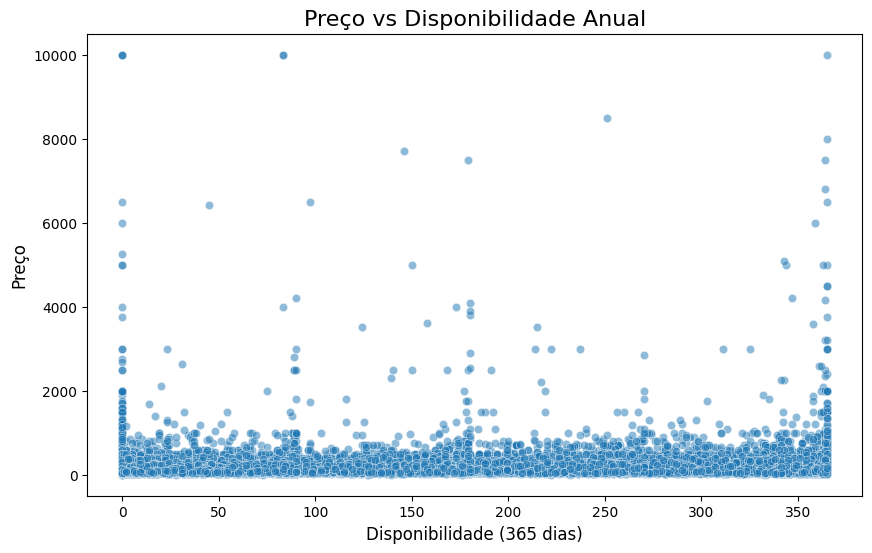

In [44]:
#grafico Preço vs Disponibilidade
plt.figure(figsize=(10, 6))
sns.scatterplot(x='disponibilidade_365', y='price', data=df, alpha=0.5)
plt.title('Preço vs Disponibilidade Anual', fontsize=16)
plt.xlabel('Disponibilidade (365 dias)', fontsize=12)
plt.ylabel('Preço', fontsize=12)
plt.show()

#### C) Existe algum padrão no texto do nome do local para lugares de mais alto valor?

#### Resposta:
- Anúncios de alto valor frequentemente incluem termos como 'apartament', 'spacious', 'luxury', 'cozy',  sugerindo que destacar características premium aumenta a percepção de valor do imóvel.

<ipython-input-45-794a760e299f>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




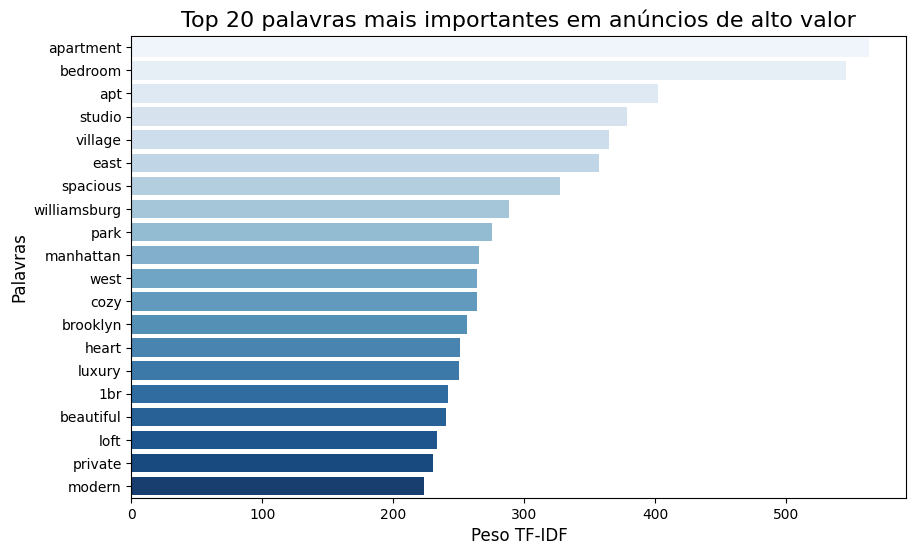

In [45]:
anuncio_alto_valor = df_new[df_new['price'] > df_new['price'].quantile(0.75)]['nome']

# Vetorização com TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(anuncio_alto_valor)

# Palavras mais importantes
feature_names = vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.sum(axis=0).A1
tfidf_df = pd.DataFrame({'palavra': feature_names, 'peso': tfidf_scores})
tfidf_df = tfidf_df.sort_values(by='peso', ascending=False)

# Visualizar as palavras mais importantes
plt.figure(figsize=(10, 6))
sns.barplot(x='peso', y='palavra', data=tfidf_df.head(20), palette='Blues')
plt.title('Top 20 palavras mais importantes em anúncios de alto valor', fontsize=16)
plt.xlabel('Peso TF-IDF', fontsize=12)
plt.ylabel('Palavras', fontsize=12)
plt.show()

# Regressão
### Modelo escolhido: XGBoost

## Pré processamento antes da implementação do modelo


####preprocess_data

O objetivo dessa função é tratar o dataset, ele já tinha sido tratado antes mas precisamos de um tratamento mais objetivo para utilizarmos um modelo de regressão. Funcionalidades da função:
- Trata valores ausentes (missing values) nas colunas
- Remove outliers de preço usando o método IQR
- Remove colunas que não são úteis para o modelo
- Cria novas features (engenharia de features):

- - price_per_night: preço por noite
- - review_frequency: frequência de reviews
- - location_score: pontuação para localização premium


- Converte variáveis categóricas em numéricas (one-hot encoding)
- Trata valores infinitos e muito grandes

In [114]:
def preprocess_data(df):
    df_processed = df.copy()
    #tratando valores ausentes
    df_processed['reviews_por_mes'].fillna(0, inplace=True)
    df_processed['nome'].fillna('Sem anuncio', inplace=True)
    df_processed['host_name'].fillna("Sem nome", inplace=True)
    df_processed.drop(columns=['ultima_review'], inplace=True)
    #Removendo outliers usando método IQR para price
    q1 = df_processed['price'].quantile(0.25)
    q3 = df_processed['price'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df_processed = df_processed[
        (df_processed['price'] >= lower_bound) &
        (df_processed['price'] <= upper_bound)
    ]

    #removendo colunas desnecessárias
    df_processed = df_processed.drop(columns=['id', 'nome', 'host_id', 'host_name'])
    #feature engineering com tratamento de valores infinitos/muito grandes
    # Adicionando features de interação com tratamento de divisão por zero
    df_processed['minimo_noites'] = np.where(df_processed['minimo_noites'] == 0, 1, df_processed['minimo_noites'])
    df_processed['disponibilidade_365'] = np.where(df_processed['disponibilidade_365'] == 0, 1, df_processed['disponibilidade_365'])
    df_processed['price_per_night'] = df_processed['price'] / df_processed['minimo_noites']
    df_processed['review_frequency'] = df_processed['numero_de_reviews'] / df_processed['disponibilidade_365']
    # Limita valores muito grandes
    df_processed['price_per_night'] = df_processed['price_per_night'].clip(upper=df_processed['price_per_night'].quantile(0.99))
    df_processed['review_frequency'] = df_processed['review_frequency'].clip(upper=df_processed['review_frequency'].quantile(0.99))
    df_processed['location_score'] = df_processed.apply(
        lambda x: 1 if x['bairro_group'] in ['Manhattan', 'Brooklyn'] else 0,
        axis=1
    )
    # one-hot encoding para variáveis categóricas
    categorical_columns = df_processed.select_dtypes(include=['object']).columns
    df_processed = pd.get_dummies(df_processed, columns=categorical_columns, drop_first=True)
    # removendo quaisquer valores infinitos remanescentes
    df_processed = df_processed.replace([np.inf, -np.inf], np.nan)
    df_processed = df_processed.fillna(df_processed.mean())
    return df_processed

####Treinar

Função que tem como objetivo treinar o modelo com os dados já processado pela função anterior. Configurando o modelo XGBoost com parâmetros otimizados
O que faz:

- `n_estimators=200:` número de árvores
- `learning_rate=0.05`: taxa de aprendizado
- `max_depth=6`: profundidade máxima das árvores
- `min_child_weight`: Determina o peso mínimo somado de amostras em um nó folha.
- `subsample`: Fração de amostras utilizadas para treinar cada árvore
- `colsample_bytree:` Fração de recursos (features) a serem selecionados aleatoriamente para construir cada árvore.
- Escala as features usando StandardScaler (normalização)
- Treina o modelo com os dados
- Retorna o modelo treinado e o scaler






In [115]:
def treinar(X, y):
    # Tratamento dos dados antes do treino
    X = X.replace([np.inf, -np.inf], np.nan)
    X = X.fillna(X.mean())
    #modelo
    model = XGBRegressor(
        objective='reg:squarederror',
        n_estimators=200,
        learning_rate=0.05,
        max_depth=6,
        min_child_weight=1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )

    #Standard scaler com tratamento de valores
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    #garantindo que não há valores infinitos após o scaling
    X_scaled = np.nan_to_num(X_scaled, nan=0.0, posinf=0.0, neginf=0.0)

    # Tratamento do target (preços)
    y = np.clip(y, 0, y.quantile(0.99))  # remove outliers extremos
    y_log = np.log1p(y)
    # Treinamento do modelo
    model.fit(X_scaled, y_log)
    return model, scaler

####Avaliar:

Seu principal objetivo é avaliar o modelo

O que faz:
- Faz previsões com os dados de teste
- Calcula diferentes métricas de avaliação:

- - MAE (Mean Absolute Error): erro médio absoluto
- - MSE (Mean Squared Error): erro quadrático médio
- - RMSE (Root Mean Squared Error): raiz do erro quadrático médio
- - R² (R-squared): coeficiente de determinação
- - Erro Relativo em porcentagem

In [116]:
def avaliar(model, X, y, scaler):
    #tratamento dos dados de teste
    X = X.replace([np.inf, -np.inf], np.nan)
    X = X.fillna(X.mean())
    #scaling dos dados
    X_scaled = scaler.transform(X)
    X_scaled = np.nan_to_num(X_scaled, nan=0.0, posinf=0.0, neginf=0.0)
    # Predição
    y_log_pred = model.predict(X_scaled)
    y_pred = np.expm1(y_log_pred)
    #Garantindo previsões válidas
    y_pred = np.clip(y_pred, 0, y.max())
    # métricas
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)

    return {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2,
        'Erro Relativo (%)': (mae / y.mean()) * 100
    }

####predict_price:Função para prever o preço do apartamento solicitado


- Remove colunas irrelevantes e trata valores ausentes.
- Cria novas features para enriquecer a previsão.
- Alinha as colunas com os dados de treinamento.
- Normaliza os dados para a escala usada no modelo.
- Faz a previsão e ajusta o valor para garantir preços positivos.
- Aplica a transformação de escala
- Retorna o preço previsto

In [117]:
def predict_price(model, sample_data, scaler, processed_data_columns):
    try:
        #preparando os dados da amostra
        sample_df = pd.DataFrame([sample_data])
        # remove colunas desnecessárias
        sample_processed = sample_df.drop(columns=['id', 'nome', 'host_id', 'host_name', 'ultima_review'], errors='ignore')
        # Tratando valores ausentes
        sample_processed['reviews_por_mes'] = sample_processed['reviews_por_mes'].fillna(0)
        #feature engineering
        sample_processed['minimo_noites'] = np.where(sample_processed['minimo_noites'] == 0, 1, sample_processed['minimo_noites'])
        sample_processed['disponibilidade_365'] = np.where(sample_processed['disponibilidade_365'] == 0, 1, sample_processed['disponibilidade_365'])
        #criando features derivadas
        sample_processed['review_frequency'] = sample_processed['numero_de_reviews'] / sample_processed['disponibilidade_365']
        sample_processed['location_score'] = sample_processed.apply(
            lambda x: 1 if x['bairro_group'] in ['Manhattan', 'Brooklyn'] else 0,
            axis=1
        )

        #Adicionando feature de preço médio por bairro
        sample_processed['bairro_score'] = sample_processed.apply(
            lambda x: 1.5 if x['bairro_group'] == 'Manhattan' else (
                1.2 if x['bairro_group'] == 'Brooklyn' else 1.0
            ),
            axis=1
        )

        # One-hot encoding
        categorical_columns = ['bairro_group', 'bairro', 'room_type']
        sample_processed = pd.get_dummies(sample_processed, columns=categorical_columns, drop_first=True)
        #garante que todas as colunas do treino estejam presentes
        for col in processed_data_columns:
            if col not in sample_processed.columns:
                sample_processed[col] = 0
        #alinhando colunas com dados de treino
        sample_processed = sample_processed[processed_data_columns]
        # Escala as features
        X_scaled = scaler.transform(sample_processed)
        # Faz a previsão (em log scale)
        predicted_log_price = model.predict(X_scaled)[0]
        # Convertendo de volta para a escala original e garante valor positivo
        predicted_price = np.expm1(predicted_log_price)
        # Aplicando um limite mínimo razoável (por exemplo, $20)
        predicted_price = max(20.0, predicted_price)
        return predicted_price
    except Exception as e:
        print(f"Erro durante a previsão: {str(e)}")
        print(f"Colunas esperadas: {processed_data_columns}")
        print(f"Colunas fornecidas: {sample_processed.columns}")
        raise

## Executando modelo

#### Bloco Principal (if name == "main")


Tem como objetivo executar todo o pipeline de modelagem
O que faz:

- Carrega os dados do arquivo CSV
- Processa os dados
- Divide em treino e teste
- Treina o modelo
- Avalia o desempenho

In [123]:
if __name__ == "__main__":
    # Carregamento e preparação dos dados
    df = pd.read_csv("/content/drive/MyDrive/Case/teste_indicium_precificacao.csv")
    processed_df = preprocess_data(df)
    # Separação das features e target
    X = processed_df.drop('price', axis=1)
    y = processed_df['price']
    #split treino-teste
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    try:
        #treinamento
        print("Treinando modelo...")
        model, scaler = treinar(X_train, y_train)
        #avaliação
        print("Avaliando modelo...")
        metricas = avaliar(model, X_test, y_test, scaler)
        print("\nMétricas do modelo:")
        for metrica, value in metricas.items():
            print(f"{metrica}: {value:.2f}")

    except Exception as e:
        print(f"Erro durante o processamento: {str(e)}")
        print("\nInformações de debug:")
        print(f"Shape de X_train: {X_train.shape}")
        print(f"Valores infinitos em X_train: {np.isinf(X_train.values).sum()}")
        print(f"Valores NaN em X_train: {np.isnan(X_train.values).sum()}")

Treinando modelo...
Avaliando modelo...

Métricas do modelo:
MAE: 3.64
MSE: 46.30
RMSE: 6.80
R2: 0.99
Erro Relativo (%): 3.03


In [119]:
with open('price_model2.pkl', 'wb') as f:
  pickle.dump((model, scaler, X.columns), f)

# Resposta Questão 4
#### Supondo um apartamento com as seguintes características:

In [124]:
sample_data = {
'id': 2595,
'nome': 'Skylit Midtown Castle',
'host_id': 2845,
'host_name': 'Jennifer',
'bairro_group': 'Manhattan',
'bairro': 'Midtown',
'latitude': 40.75362,
'longitude': -73.98377,
'room_type': 'Entire home/apt',
'minimo_noites': 1,
'numero_de_reviews': 45,
'ultima_review': '2019-05-21',
'reviews_por_mes': 0.38,
'calculado_host_listings_count': 2,
'disponibilidade_365': 355
}

preco_previsto = predict_price(model, sample_data, scaler, X.columns)
print(f"\nPreço do apartamento previsto pelo modelo: ${preco_previsto:.2f}")


Preço do apartamento previsto pelo modelo: $20.00


-------------------------------

In [134]:
print(f"Pandas: {pd.__version__}")
print(f"Scikit-learn: {sklearn.__version__}")
print(f"XGBoost: {xgb.__version__}")
print(f"Seaborn: {sns.__version__}")
print(f"Matplotlib: {plt.matplotlib.__version__}")
print(f"Numpy: {np.__version__}")

Pandas: 2.2.2
Scikit-learn: 1.1.3
XGBoost: 1.6.2
Seaborn: 0.13.2
Matplotlib: 3.10.0
Numpy: 1.26.4
